First let's read the data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import cv2
import numpy as np
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("muratkokludataset/date-fruit-datasets")

print("Path to dataset files:", path)

100%|██████████| 408k/408k [00:00<00:00, 61.4MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/muratkokludataset/date-fruit-datasets/versions/1


In [3]:
# List files and folders
for root, dirs, files in os.walk(path):
    print(f"Root: {root}")
    print(f"Directories: {dirs}")
    print(f"Files: {files}\n")

Root: /root/.cache/kagglehub/datasets/muratkokludataset/date-fruit-datasets/versions/1
Directories: ['Date_Fruit_Datasets']
Files: []

Root: /root/.cache/kagglehub/datasets/muratkokludataset/date-fruit-datasets/versions/1/Date_Fruit_Datasets
Directories: []
Files: ['Date_Fruit_Datasets.xlsx', 'Date_Fruit_Datasets_Citation_Request.txt', 'Date_Fruit_Datasets.arff']



In [4]:
data = pd.read_excel('/root/.cache/kagglehub/datasets/muratkokludataset/date-fruit-datasets/versions/1/Date_Fruit_Datasets/Date_Fruit_Datasets.xlsx')

In [5]:
data

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.9080,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.1440,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.3940,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.2100,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.3540,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,255403,1925.3650,691.8453,477.1796,0.7241,570.2536,0.9785,261028,0.7269,1.4499,...,2.2423,2.3704,2.7202,-25296416768,-19168882688,-18473392128,49.0869,43.0422,42.4153,SOGAY
894,365924,2664.8230,855.4633,551.5447,0.7644,682.5752,0.9466,386566,0.6695,1.5510,...,3.4109,3.5805,3.9910,-31605219328,-21945366528,-19277905920,46.8086,39.1046,36.5502,SOGAY
895,254330,1926.7360,747.4943,435.6219,0.8126,569.0545,0.9925,256255,0.7240,1.7159,...,2.2759,2.5090,2.6951,-22242772992,-19594921984,-17592152064,44.1325,40.7986,40.9769,SOGAY
896,238955,1906.2679,716.6485,441.8297,0.7873,551.5859,0.9604,248795,0.6954,1.6220,...,2.6769,2.6874,2.7991,-26048595968,-21299822592,-19809978368,51.2267,45.7162,45.6260,SOGAY


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

In [7]:
data['Class'].unique()

array(['BERHI', 'DEGLET', 'DOKOL', 'IRAQI', 'ROTANA', 'SAFAVI', 'SOGAY'],
      dtype=object)

In [8]:
X = data.drop(['Class'],axis=1)
y = data['Class']

In [9]:
X

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
0,422163,2378.9080,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,0.6019,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400
1,338136,2085.1440,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,0.4134,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315
2,526843,2647.3940,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,0.9183,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378
3,416063,2351.2100,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,1.8028,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882
4,347562,2160.3540,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,0.8865,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,255403,1925.3650,691.8453,477.1796,0.7241,570.2536,0.9785,261028,0.7269,1.4499,...,-0.1398,2.2423,2.3704,2.7202,-25296416768,-19168882688,-18473392128,49.0869,43.0422,42.4153
894,365924,2664.8230,855.4633,551.5447,0.7644,682.5752,0.9466,386566,0.6695,1.5510,...,0.5611,3.4109,3.5805,3.9910,-31605219328,-21945366528,-19277905920,46.8086,39.1046,36.5502
895,254330,1926.7360,747.4943,435.6219,0.8126,569.0545,0.9925,256255,0.7240,1.7159,...,0.2665,2.2759,2.5090,2.6951,-22242772992,-19594921984,-17592152064,44.1325,40.7986,40.9769
896,238955,1906.2679,716.6485,441.8297,0.7873,551.5859,0.9604,248795,0.6954,1.6220,...,0.5325,2.6769,2.6874,2.7991,-26048595968,-21299822592,-19809978368,51.2267,45.7162,45.6260


In [10]:
y

,Class
0,BERHI
1,BERHI
2,BERHI
3,BERHI
4,BERHI
...,...
893,SOGAY
894,SOGAY
895,SOGAY
896,SOGAY


Data Transformation

In [11]:
def transformation(X,y):
    X_scaler = minmax_scale(X)
    X = pd.DataFrame(X_scaler)

    class_encoder = LabelEncoder()
    y = class_encoder.fit_transform(y)
    return X,y

X,y = transformation(X,y)
print(X)
print(y)

           0         1         2         3         4         5         6   \
0    0.772274  0.772079  0.565604  0.841941  0.446429  0.871512  0.983209   
1    0.617835  0.617480  0.436904  0.775906  0.342186  0.773229  1.000000   
2    0.964674  0.913374  0.681733  0.933143  0.464896  0.981104  0.992537   
3    0.761063  0.757502  0.554467  0.841456  0.430098  0.864727  0.983831   
4    0.635159  0.657060  0.482240  0.759716  0.460470  0.784821  0.958955   
..        ...       ...       ...       ...       ...       ...       ...   
893  0.465773  0.533393  0.400815  0.621454  0.578907  0.663606  0.882463   
894  0.668908  0.922547  0.585486  0.718768  0.640415  0.806960  0.684080   
895  0.463801  0.534115  0.463625  0.567071  0.713980  0.662076  0.969527   
896  0.435542  0.523343  0.428810  0.575194  0.675366  0.639781  0.769900   
897  0.628230  0.724906  0.549798  0.696824  0.634768  0.780204  0.879975   

           7         8         9   ...        24        25        26  \
0  

Splitting the data train data,test data, validation data

In [12]:
def split_data(X,y,train_size,random_state):
    X_train,X_test,y_train,y_test = train_test_split(X, y, train_size = train_size, random_state=random_state)
    return X_train,X_test,y_train,y_test

X_train,X_temp,y_train,y_temp = split_data(X,y,0.8,42)
X_val,X_test,y_val,y_test = split_data(X_temp,y_temp,0.5,42)
print(f"Length of the dataset: {len(X)}")
print(f"Length of the training dataset: {len(X_train)}")
print(f"Length of the validation dataset: {len(X_val)}")
print(f"Length of the test dataset: {len(X_test)}")

Length of the dataset: 898
Length of the training dataset: 718
Length of the validation dataset: 90
Length of the test dataset: 90


# SVM

In [13]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [14]:
#Define the SVM model
svm_model = SVC()

#Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Initialize Grid Search
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', verbose=2)

# Train model using Grid Search
grid_search.fit(X_train, y_train)

# Get the best model
best_svm = grid_search.best_estimator_
print("\nBest Hyperparameters:", grid_search.best_params_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale

In [15]:
import seaborn as sns
from sklearn.model_selection import learning_curve
def evaluate_model(model, X, y, dataset_name, label_to_class):
    # Predict on the dataset
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    conf_matrix = confusion_matrix(y, y_pred)
    class_report = classification_report(
        y, y_pred, target_names=[label_to_class[label] for label in sorted(label_to_class.keys())]
    )

    # Print results
    print(f"{dataset_name} Accuracy: {accuracy}")
    print(f"{dataset_name} Confusion Matrix:\n{conf_matrix}")
    print(f"{dataset_name} Classification Report:\n{class_report}")

    # Plot confusion matrix
    class_names = [label_to_class[label] for label in sorted(label_to_class.keys())]
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title(f'{dataset_name} Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    # Identify and display misclassified samples
    misclassified_samples = np.where(y_pred != y)[0]
    n_sample = min(5, len(misclassified_samples))  # Show up to 5 misclassified samples
    print(f"\nSome misclassified samples from {dataset_name} Set:")
    for i in misclassified_samples[:n_sample]:
        predicted_label = y_pred[i]
        actual_label = y[i]
        predicted_class = label_to_class[predicted_label]
        actual_class = label_to_class[actual_label]
        print(f"Sample {i+1}: Predicted = {predicted_class}, Actual = {actual_class}")

Validation Set Results:
Validation Accuracy: 0.9444444444444444
Validation Confusion Matrix:
[[ 4  0  0  0  0  0  0]
 [ 0  8  0  0  0  0  1]
 [ 0  1 28  0  0  0  0]
 [ 0  0  0  3  0  0  0]
 [ 0  0  0  2 16  0  0]
 [ 0  0  0  0  0 19  0]
 [ 0  1  0  0  0  0  7]]
Validation Classification Report:
              precision    recall  f1-score   support

       BERHI       1.00      1.00      1.00         4
      DEGLET       0.80      0.89      0.84         9
       DOKOL       1.00      0.97      0.98        29
       IRAQI       0.60      1.00      0.75         3
      ROTANA       1.00      0.89      0.94        18
      SAFAVI       1.00      1.00      1.00        19
       SOGAY       0.88      0.88      0.88         8

    accuracy                           0.94        90
   macro avg       0.90      0.95      0.91        90
weighted avg       0.96      0.94      0.95        90



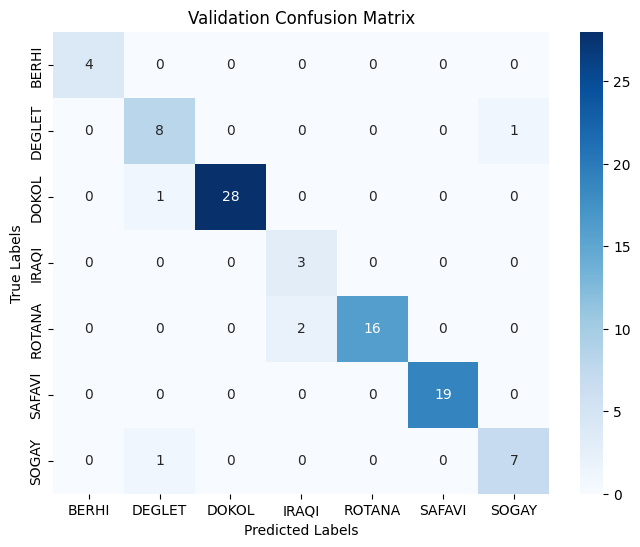


Some misclassified samples from Validation Set:
Sample 19: Predicted = DEGLET, Actual = SOGAY
Sample 21: Predicted = IRAQI, Actual = ROTANA
Sample 43: Predicted = IRAQI, Actual = ROTANA
Sample 50: Predicted = SOGAY, Actual = DEGLET
Sample 86: Predicted = DEGLET, Actual = DOKOL

Test Set Results:
Test Accuracy: 0.9333333333333333
Test Confusion Matrix:
[[ 7  0  0  1  0  0  0]
 [ 0 10  0  0  0  0  1]
 [ 0  2 19  0  0  0  0]
 [ 0  0  0  7  0  0  0]
 [ 0  0  0  0 17  0  0]
 [ 0  0  0  0  0 14  0]
 [ 0  2  0  0  0  0 10]]
Test Classification Report:
              precision    recall  f1-score   support

       BERHI       1.00      0.88      0.93         8
      DEGLET       0.71      0.91      0.80        11
       DOKOL       1.00      0.90      0.95        21
       IRAQI       0.88      1.00      0.93         7
      ROTANA       1.00      1.00      1.00        17
      SAFAVI       1.00      1.00      1.00        14
       SOGAY       0.91      0.83      0.87        12

    accuracy  

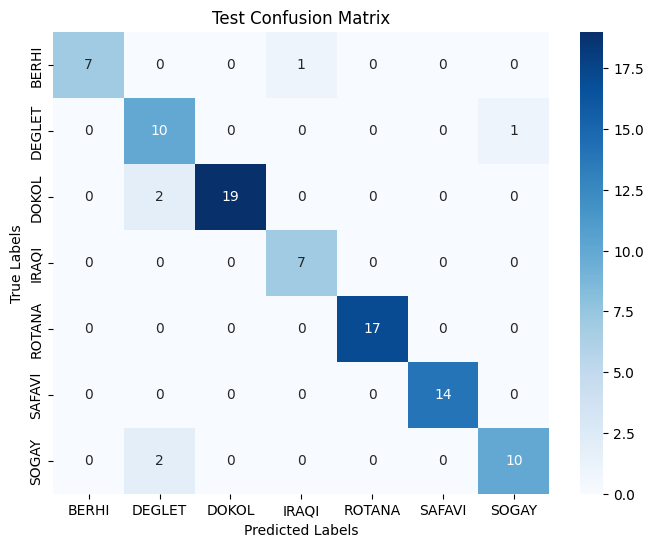


Some misclassified samples from Test Set:
Sample 20: Predicted = SOGAY, Actual = DEGLET
Sample 23: Predicted = DEGLET, Actual = SOGAY
Sample 48: Predicted = DEGLET, Actual = DOKOL
Sample 50: Predicted = DEGLET, Actual = SOGAY
Sample 60: Predicted = IRAQI, Actual = BERHI


In [16]:
# Class mapping
label_to_class = {
    0: 'BERHI',
    1: 'DEGLET',
    2: 'DOKOL',
    3: 'IRAQI',
    4: 'ROTANA',
    5: 'SAFAVI',
    6: 'SOGAY'
}

#Evaluate on Validation Set
print("Validation Set Results:")
evaluate_model(best_svm, X_val, y_val, "Validation", label_to_class)

# Evaluate on Test Set
print("\nTest Set Results:")
evaluate_model(best_svm, X_test, y_test, "Test", label_to_class)

In [17]:
# Cross-validation on the training set
cv_scores = cross_val_score(best_svm, X_train, y_train, cv=5)
print("\nCross-validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())


Cross-validation Scores: [0.93055556 0.93055556 0.88194444 0.94405594 0.93006993]
Mean CV Score: 0.9234362859362859


In [18]:
from matplotlib.colors import ListedColormap
# Define the function to plot decision boundaries
def plot_decision_boundary(X, y, classifier, title):
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.title(title)
    plt.xlabel('class 1')
    plt.ylabel('class 2')
    plt.show()

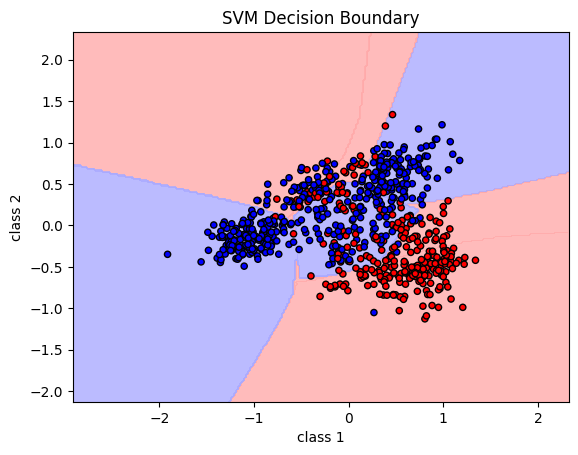

In [19]:
from sklearn.decomposition import PCA
# Perform PCA to reduce the dataset to 2 dimensions
pca = PCA(n_components = 2)
X_train_2D = pca.fit_transform(X_train)
X_test_2D = pca.transform(X_test)

# Retrain models on the reduced dataset
svm_2D = SVC(kernel= grid_search.best_params_['kernel'], C = grid_search.best_params_['C'])
svm_2D.fit(X_train_2D, y_train)

# Plot decision boundaries for each model on the 2D dataset
plot_decision_boundary(X_train_2D, y_train, svm_2D, 'SVM Decision Boundary')